In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:\programowanie\python_mrowa\wdfcs\zad1_wch_1.txt', sep='\t', header=1, names=['r', 'U'])
df = df.replace(',', '.', regex=True)
df['r'] = df['r'].astype(float)
df['U'] = df['U'].astype(float)
print(df.head())
print(df.dtypes)

      r           U
0  3.01  122.915651
1  3.02  117.252843
2  3.03  111.845622
3  3.04  106.682043
4  3.05  101.750746
r    float64
U    float64
dtype: object


4.21 -2.999996416
        3         2
-12.75 x + 169.6 x - 749.9 x + 1100
 
38.24
 
-76.48 x + 339.2
17.165646952285897


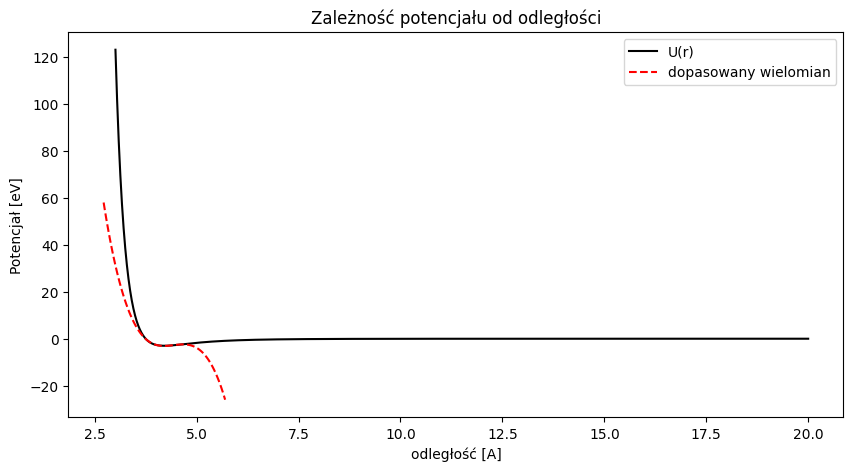

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['r'], df['U'], color='black', linestyle='solid', label='U(r)')
ax.set_xlabel('odległość [A]')
ax.set_ylabel('Potencjał [eV]')
ax.set_title('Zależność potencjału od odległości')

min_U = df['U'].min()
min_r = df['r'][df['U'].idxmin()]
print(min_r, min_U)

df_fit = df[(df['r'] > min_r-0.5) & (df['r'] < min_r+0.5)]

# fit a polynomial function to the plot
coefficients = np.polyfit(df_fit['r'], df_fit['U'], 3)
polynomial = np.poly1d(coefficients)

# plot the polynomial function
x = np.linspace(df_fit['r'].min()-1, df_fit['r'].max()+1, 100)
y = polynomial(x)
ax.plot(x, y, color='red', linestyle='dashed', label='dopasowany wielomian')

# update the legend
ax.legend()

print(polynomial)
print(polynomial.deriv(3)*-0.5)
print(polynomial.deriv(2))
print(polynomial.deriv(2)[1]*min_r+polynomial.deriv(2)[0])